![title](title.png)

## Завдання

1. Взяти файл з даними у вiдповiдностi з варiантом.

2. Побудувати частi набори та асоцiативнi правила (АП), використовуючи алгоритм Apriori. Дослiдити множини АП залежно вiд параметрiв побудови АП:

* мiнiмальної пiдтримки,
* мiнiмальної достовiрностi,
* максимальної потужностi частих наборiв.


Пiдiбрати значення параметрiв алгоритму Apriori, якi призводять до
значущих АП. АП Rk вважати значущим, якщо покращення (improvement
або лiфт (lift)): Improv(Rk) > 1.


3. Побудувати частi набори та множину АП, використовуючи алгоритм FPросту.
Дослiдити множини АП залежно вiд параметрiв побудови АП, якi
було наведено вище для Apriori.

Пiдiбрати значення параметрiв алгоритму FP-росту, якi призводять до
значущих АП.

4. Зробити висновки щодо впливу параметрiв алгоритмiв Apriori та FP-росту на знайденi множини АП.
5. Знайти значення прогнозу на основi побудованої множини правил.
6. Порiвняти результати, отриманi алгоритмами Apriori та FP-росту.

#### 6 варіант

Var_6_1000_Transactions

### 1. Взяти файл з даними у вiдповiдностi з варiантом. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data = pd.read_csv('Var_6_1000_Transactions.csv')
data

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035
...,...,...
9715,1000,35951
9716,1000,3025
9717,1000,35734
9718,1000,26800


In [3]:
def make_orders(id_order, id_item):
    result = []
    add = []
    
    curr_id = id_order[0]
    for i in range(len(id_order)):
        if id_order[i] == curr_id:
            add.append(id_item[i])
        else:
            result.append(add)
            add = []
            curr_id = id_order[i]
            add.append(id_item[i])
    result.append(add)
    return result

In [102]:
orders = make_orders(list(data['order_id']), list(data['product_id']))
print('Number of successful orders: ', len(set(data['order_id'])))

print('Orders (10):\n')
for i in range(10):
    print(orders[i])

Number of successful orders:  956
Orders (10):

[33120, 28985, 9327, 45918, 30035, 17794, 40141, 1819, 43668]
[33754, 24838, 17704, 21903, 17668, 46667, 17461, 32665]
[46842, 26434, 39758, 27761, 10054, 21351, 22598, 34862, 40285, 17616, 25146, 32645, 41276]
[13176, 15005, 47329, 27966, 23909, 48370, 13245, 9633, 27360, 6348, 40878, 6184, 48002, 20914, 37011, 12962, 45698, 24773, 18569, 41176, 48366, 47209, 46522, 38693, 48825, 8479]
[40462, 15873, 41897]
[34050, 46802]
[23423]
[21405, 47890, 11182, 2014, 29193, 34203, 14992, 31506, 23288, 44533, 18362, 27366, 432, 3990, 14183]
[24852, 4796, 31717, 47766, 4605, 1529, 21137, 22122, 34134, 27156, 14992, 49235, 26842, 3464, 25720]
[30162, 27085, 5994, 1313, 31506]


In [5]:
def encoding(orders):
    encoder = TransactionEncoder()
    data = encoder.fit(orders).transform(orders)
    return pd.DataFrame(data, columns=encoder.columns_)

In [6]:
data_frame = encoding(orders)
data_frame.astype("int")[600:650]

,23,27,28,34,45,54,79,86,95,129,...,49519,49520,49533,49588,49605,49610,49621,49628,49667,49683
600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Побудувати частi набори та асоцiативнi правила (АП), використовуючи алгоритм Apriori.
### +3. Побудувати частi набори та множину АП, використовуючи алгоритм FP-росту.

Дослiдити множини АП залежно вiд параметрiв побудови АП:

* мiнiмальної пiдтримки,
* мiнiмальної достовiрностi,
* максимальної потужностi частих наборiв.

Пiдiбрати значення параметрiв алгоритму Apriori, якi призводять до
значущих АП.

In [7]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [8]:
def rules_support_plot(num_rules, metric_name, metric_values, confs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    
    ax1.plot(metric_values, num_rules)
    ax1.set_xlabel(metric_name)
    ax1.set_ylabel('number of rules')
    
    ax2.plot(metric_values, confs)
    ax2.set_xlabel(metric_name)
    ax2.set_ylabel('max confidence')
    
    plt.show()

In [9]:
def analyze_support_lenght(df, algorithm):
    max_confs1 = []
    n_rules1 = []
    supports = [0.003+i*10**(-3) for i in range(6)]
    length = [2, 3, 4]
    
    for support in supports:
        print('min_support: ', support)
        
        rules = association_rules(algorithm(df, min_support=support), metric='confidence', min_threshold=0.5)
        display(rules)
        
        n_rules1.append(len(rules.index))
        max_confs1.append(max(list(rules['confidence'])))
        
        n_rules2 = []
        max_confs2 = []
        
        for lng in length:
            
            rules = association_rules(algorithm(df, min_support=support, max_len = lng), metric='confidence', min_threshold=0.5)
            n_rules2.append(len(rules.index))
            if(len(list(rules['confidence']))):
                max_confs2.append(max(list(rules['confidence'])))
            else:
                max_confs2.append(0.0)
        
        rules_support_plot(n_rules2, 'max_len', length, max_confs2)
          
    rules_support_plot(n_rules1,'min_support', supports, max_confs1)
        
        

In [86]:
def rules_confidence_plot(num_rules, confidence):
    plt.plot(confidence, num_rules)
    plt.xlabel('min_confidence')
    plt.ylabel('number of rules')
    plt.show()

In [83]:
def analyze_confidence(df, algorithm):
    confs = [i*0.1 for i in range(5, 11)]
    n_rules = []
    
    for conf in confs:
        print('Confidence: ', conf)
        rules = association_rules(algorithm(df, min_support=0.004, max_len = 3), metric='confidence', min_threshold=conf)
        display(rules)
        n_rules.append(len(rules.index))
        
    rules_confidence_plot(n_rules, confs)

##### Apriory

min_support:  0.003


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4),(2221),0.010460,0.158996,0.005230,0.50,3.144737,0.003567,1.682008
1,(28),(1144),0.004184,0.122385,0.003138,0.75,6.128205,0.002626,3.510460
2,(42),(4191),0.003138,0.025105,0.003138,1.00,39.833333,0.003059,inf
3,(49),(1144),0.005230,0.122385,0.003138,0.60,4.902564,0.002498,2.194038
4,(60),(2490),0.003138,0.039749,0.003138,1.00,25.157895,0.003013,inf
...,...,...,...,...,...,...,...,...,...
238,"(1953, 1683, 2221)",(3632),0.004184,0.020921,0.003138,0.75,35.850000,0.003051,3.916318
239,"(3632, 1953)","(1683, 2221)",0.003138,0.007322,0.003138,1.00,136.571429,0.003115,inf
240,"(3632, 1683)","(1953, 2221)",0.004184,0.025105,0.003138,0.75,29.875000,0.003033,3.899582
241,"(3632, 2221)","(1953, 1683)",0.005230,0.006276,0.003138,0.60,95.600000,0.003105,2.484310


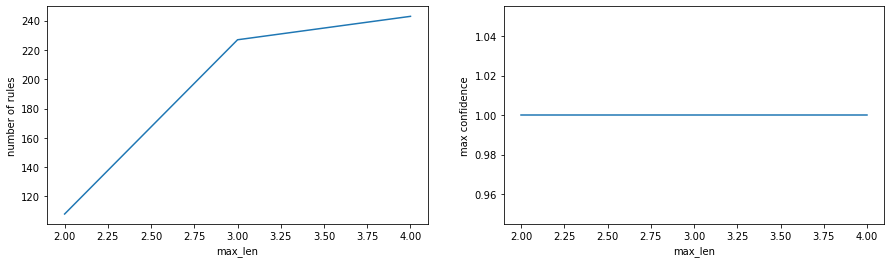

min_support:  0.004


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4),(2221),0.010460,0.158996,0.005230,0.500000,3.144737,0.003567,1.682008
1,(91),(1953),0.010460,0.069038,0.006276,0.600000,8.690909,0.005554,2.327406
2,(126),(1144),0.007322,0.122385,0.004184,0.571429,4.669109,0.003288,2.047768
3,(402),(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
4,(461),(1144),0.007322,0.122385,0.004184,0.571429,4.669109,0.003288,2.047768
5,(485),(2221),0.012552,0.158996,0.007322,0.583333,3.668860,0.005326,2.018410
6,(2058),(1144),0.010460,0.122385,0.005230,0.500000,4.085470,0.003950,1.755230
7,(2332),(1144),0.007322,0.122385,0.004184,0.571429,4.669109,0.003288,2.047768
8,(2675),(1144),0.013598,0.122385,0.007322,0.538462,4.399737,0.005658,1.901499
9,(3529),(1144),0.008368,0.122385,0.004184,0.500000,4.085470,0.003160,1.755230


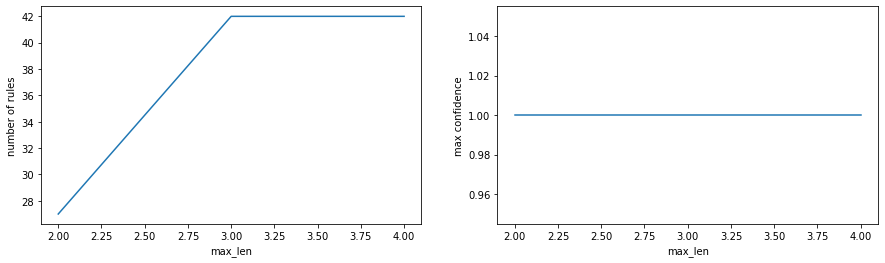

min_support:  0.005


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4),(2221),0.010460,0.158996,0.005230,0.500000,3.144737,0.003567,1.682008
1,(91),(1953),0.010460,0.069038,0.006276,0.600000,8.690909,0.005554,2.327406
2,(485),(2221),0.012552,0.158996,0.007322,0.583333,3.668860,0.005326,2.018410
3,(2058),(1144),0.010460,0.122385,0.005230,0.500000,4.085470,0.003950,1.755230
4,(2675),(1144),0.013598,0.122385,0.007322,0.538462,4.399737,0.005658,1.901499
5,(1324),(2221),0.014644,0.158996,0.007322,0.500000,3.144737,0.004994,1.682008
6,(2512),(2221),0.029289,0.158996,0.014644,0.500000,3.144737,0.009988,1.682008
7,(2975),(2221),0.009414,0.158996,0.005230,0.555556,3.494152,0.003733,1.892259
8,(3675),(2221),0.011506,0.158996,0.006276,0.545455,3.430622,0.004447,1.850209
9,(4153),(2221),0.009414,0.158996,0.005230,0.555556,3.494152,0.003733,1.892259


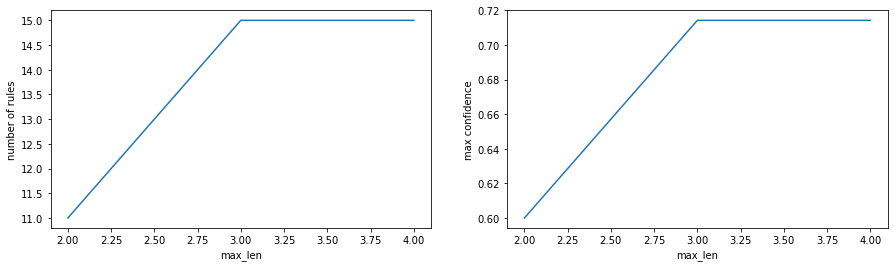

min_support:  0.006


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(91),(1953),0.010460,0.069038,0.006276,0.600000,8.690909,0.005554,2.327406
1,(485),(2221),0.012552,0.158996,0.007322,0.583333,3.668860,0.005326,2.018410
2,(2675),(1144),0.013598,0.122385,0.007322,0.538462,4.399737,0.005658,1.901499
3,(1324),(2221),0.014644,0.158996,0.007322,0.500000,3.144737,0.004994,1.682008
4,(2512),(2221),0.029289,0.158996,0.014644,0.500000,3.144737,0.009988,1.682008
5,(3675),(2221),0.011506,0.158996,0.006276,0.545455,3.430622,0.004447,1.850209


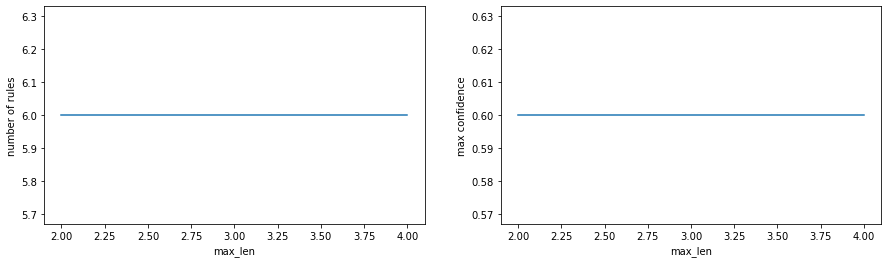

min_support:  0.007


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(485),(2221),0.012552,0.158996,0.007322,0.583333,3.668860,0.005326,2.018410
1,(2675),(1144),0.013598,0.122385,0.007322,0.538462,4.399737,0.005658,1.901499
2,(1324),(2221),0.014644,0.158996,0.007322,0.500000,3.144737,0.004994,1.682008
3,(2512),(2221),0.029289,0.158996,0.014644,0.500000,3.144737,0.009988,1.682008


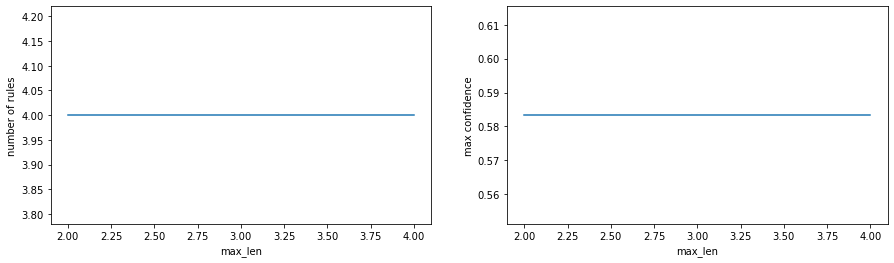

min_support:  0.008


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2512),(2221),0.029289,0.158996,0.014644,0.5,3.144737,0.009988,1.682008


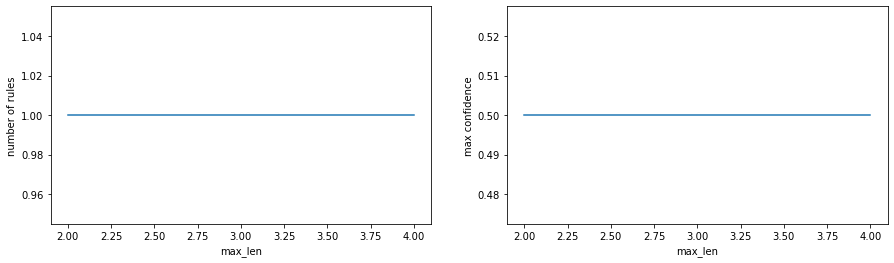

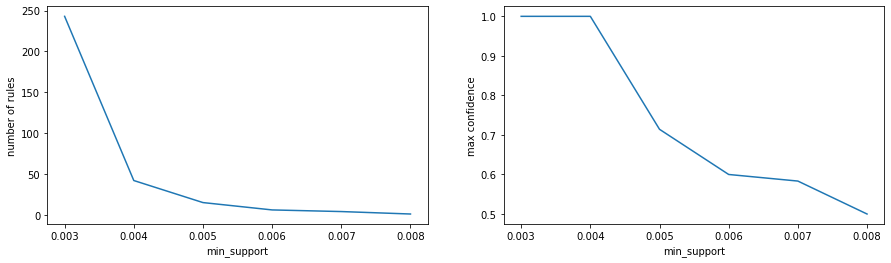

In [81]:
analyze_support_lenght(data_frame, apriori)

Confidence:  0.5


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4),(2221),0.010460,0.158996,0.005230,0.500000,3.144737,0.003567,1.682008
1,(91),(1953),0.010460,0.069038,0.006276,0.600000,8.690909,0.005554,2.327406
2,(126),(1144),0.007322,0.122385,0.004184,0.571429,4.669109,0.003288,2.047768
3,(402),(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
4,(461),(1144),0.007322,0.122385,0.004184,0.571429,4.669109,0.003288,2.047768
5,(485),(2221),0.012552,0.158996,0.007322,0.583333,3.668860,0.005326,2.018410
6,(2058),(1144),0.010460,0.122385,0.005230,0.500000,4.085470,0.003950,1.755230
7,(2332),(1144),0.007322,0.122385,0.004184,0.571429,4.669109,0.003288,2.047768
8,(2675),(1144),0.013598,0.122385,0.007322,0.538462,4.399737,0.005658,1.901499
9,(3529),(1144),0.008368,0.122385,0.004184,0.500000,4.085470,0.003160,1.755230


Confidence:  0.6000000000000001


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(402),(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
1,(3889),(1144),0.006276,0.122385,0.004184,0.666667,5.447293,0.003416,2.632845
2,(2057),(1953),0.005230,0.069038,0.004184,0.800000,11.587879,0.003823,4.654812
3,(2286),(1953),0.006276,0.069038,0.004184,0.666667,9.656566,0.003751,2.792887
4,(2468),(2221),0.006276,0.158996,0.004184,0.666667,4.192982,0.003186,2.523013
5,(2581),(2221),0.006276,0.158996,0.004184,0.666667,4.192982,0.003186,2.523013
6,(2760),(2221),0.004184,0.158996,0.004184,1.000000,6.289474,0.003519,inf
7,(4173),(2975),0.004184,0.009414,0.004184,1.000000,106.222222,0.004145,inf
8,"(3856, 1075)",(1463),0.004184,0.054393,0.004184,1.000000,18.384615,0.003957,inf
9,"(1075, 1463)",(3856),0.006276,0.027197,0.004184,0.666667,24.512821,0.004013,2.918410


Confidence:  0.7000000000000001


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(402),(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
1,(2057),(1953),0.005230,0.069038,0.004184,0.800000,11.587879,0.003823,4.654812
2,(2760),(2221),0.004184,0.158996,0.004184,1.000000,6.289474,0.003519,inf
3,(4173),(2975),0.004184,0.009414,0.004184,1.000000,106.222222,0.004145,inf
4,"(3856, 1075)",(1463),0.004184,0.054393,0.004184,1.000000,18.384615,0.003957,inf
5,"(3856, 1893)",(1463),0.005230,0.054393,0.004184,0.800000,14.707692,0.003900,4.728033
6,"(1893, 1463)",(3856),0.004184,0.027197,0.004184,1.000000,36.769231,0.004070,inf
7,"(1953, 2313)",(2221),0.007322,0.158996,0.005230,0.714286,4.492481,0.004066,2.943515
8,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.000000,6.289474,0.003519,inf
9,"(4171, 2221)",(1953),0.005230,0.069038,0.004184,0.800000,11.587879,0.003823,4.654812


Confidence:  0.8


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2760),(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf
1,(4173),(2975),0.004184,0.009414,0.004184,1.0,106.222222,0.004145,inf
2,"(3856, 1075)",(1463),0.004184,0.054393,0.004184,1.0,18.384615,0.003957,inf
3,"(1893, 1463)",(3856),0.004184,0.027197,0.004184,1.0,36.769231,0.004070,inf
4,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf


Confidence:  0.9


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2760),(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf
1,(4173),(2975),0.004184,0.009414,0.004184,1.0,106.222222,0.004145,inf
2,"(3856, 1075)",(1463),0.004184,0.054393,0.004184,1.0,18.384615,0.003957,inf
3,"(1893, 1463)",(3856),0.004184,0.027197,0.004184,1.0,36.769231,0.004070,inf
4,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf


Confidence:  1.0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2760),(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf
1,(4173),(2975),0.004184,0.009414,0.004184,1.0,106.222222,0.004145,inf
2,"(3856, 1075)",(1463),0.004184,0.054393,0.004184,1.0,18.384615,0.003957,inf
3,"(1893, 1463)",(3856),0.004184,0.027197,0.004184,1.0,36.769231,0.004070,inf
4,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf


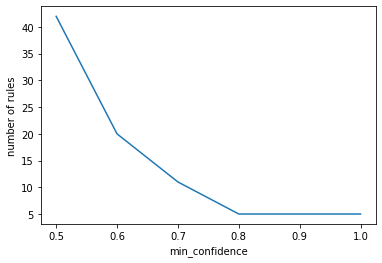

In [87]:
analyze_confidence(data_frame, apriori)

##### FP-growth

min_support:  0.003


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(1561, 2054)",(1144),0.004184,0.122385,0.003138,0.75,6.128205,0.002626,3.510460
1,"(1561, 2233)",(2221),0.005230,0.158996,0.003138,0.60,3.773684,0.002307,2.102510
2,"(1561, 2221)",(2233),0.005230,0.034519,0.003138,0.60,17.381818,0.002958,2.413703
3,"(2578, 4437)",(2221),0.003138,0.158996,0.003138,1.00,6.289474,0.002639,inf
4,"(2578, 2221)",(4437),0.006276,0.028243,0.003138,0.50,17.703704,0.002961,1.943515
...,...,...,...,...,...,...,...,...,...
238,(3512),(1144),0.004184,0.122385,0.003138,0.75,6.128205,0.002626,3.510460
239,(3824),(2221),0.005230,0.158996,0.003138,0.60,3.773684,0.002307,2.102510
240,(1065),(1144),0.003138,0.122385,0.003138,1.00,8.170940,0.002754,inf
241,(28),(1144),0.004184,0.122385,0.003138,0.75,6.128205,0.002626,3.510460


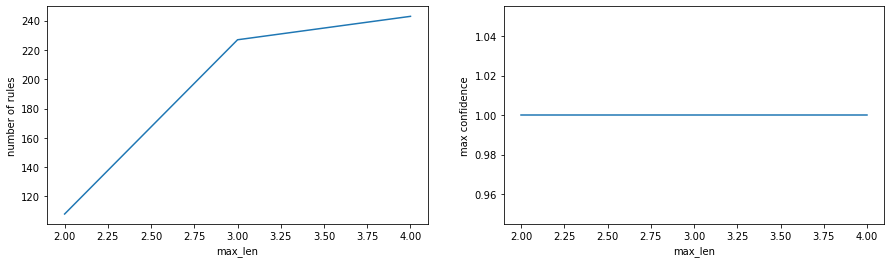

min_support:  0.004


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4171),(2221),0.009414,0.158996,0.005230,0.555556,3.494152,0.003733,1.892259
1,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.000000,6.289474,0.003519,inf
2,"(4171, 2221)",(1953),0.005230,0.069038,0.004184,0.800000,11.587879,0.003823,4.654812
3,(1324),(2221),0.014644,0.158996,0.007322,0.500000,3.144737,0.004994,1.682008
4,"(1953, 4260)",(2221),0.007322,0.158996,0.004184,0.571429,3.593985,0.003020,1.962343
5,(2414),(2221),0.008368,0.158996,0.004184,0.500000,3.144737,0.002854,1.682008
6,"(2480, 4022)",(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
7,"(4022, 1463)",(2221),0.006276,0.158996,0.004184,0.666667,4.192982,0.003186,2.523013
8,(402),(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
9,(2581),(2221),0.006276,0.158996,0.004184,0.666667,4.192982,0.003186,2.523013


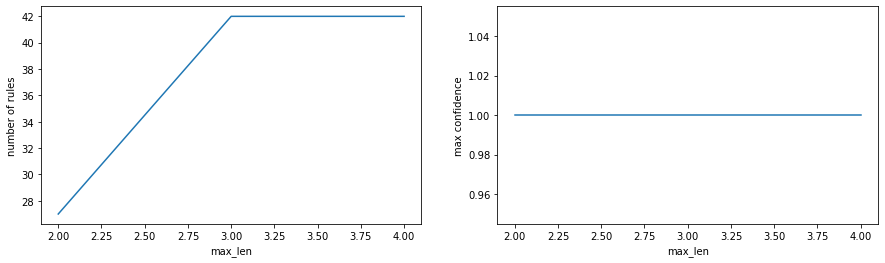

min_support:  0.005


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4171),(2221),0.009414,0.158996,0.005230,0.555556,3.494152,0.003733,1.892259
1,(1324),(2221),0.014644,0.158996,0.007322,0.500000,3.144737,0.004994,1.682008
2,"(2313, 1953)",(2221),0.007322,0.158996,0.005230,0.714286,4.492481,0.004066,2.943515
3,"(2313, 2221)",(1953),0.009414,0.069038,0.005230,0.555556,8.047138,0.004580,2.094665
4,(91),(1953),0.010460,0.069038,0.006276,0.600000,8.690909,0.005554,2.327406
5,(2512),(2221),0.029289,0.158996,0.014644,0.500000,3.144737,0.009988,1.682008
6,(2058),(1144),0.010460,0.122385,0.005230,0.500000,4.085470,0.003950,1.755230
7,(4153),(2221),0.009414,0.158996,0.005230,0.555556,3.494152,0.003733,1.892259
8,"(1953, 4018)",(2221),0.008368,0.158996,0.005230,0.625000,3.930921,0.003900,2.242678
9,"(4018, 2221)",(1953),0.008368,0.069038,0.005230,0.625000,9.053030,0.004652,2.482566


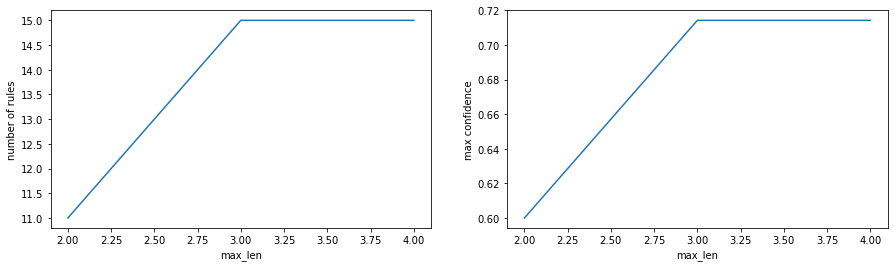

min_support:  0.006


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1324),(2221),0.014644,0.158996,0.007322,0.500000,3.144737,0.004994,1.682008
1,(91),(1953),0.010460,0.069038,0.006276,0.600000,8.690909,0.005554,2.327406
2,(2512),(2221),0.029289,0.158996,0.014644,0.500000,3.144737,0.009988,1.682008
3,(485),(2221),0.012552,0.158996,0.007322,0.583333,3.668860,0.005326,2.018410
4,(2675),(1144),0.013598,0.122385,0.007322,0.538462,4.399737,0.005658,1.901499
5,(3675),(2221),0.011506,0.158996,0.006276,0.545455,3.430622,0.004447,1.850209


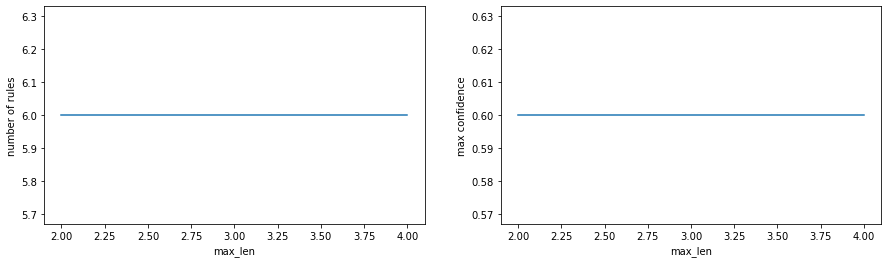

min_support:  0.007


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1324),(2221),0.014644,0.158996,0.007322,0.500000,3.144737,0.004994,1.682008
1,(2512),(2221),0.029289,0.158996,0.014644,0.500000,3.144737,0.009988,1.682008
2,(485),(2221),0.012552,0.158996,0.007322,0.583333,3.668860,0.005326,2.018410
3,(2675),(1144),0.013598,0.122385,0.007322,0.538462,4.399737,0.005658,1.901499


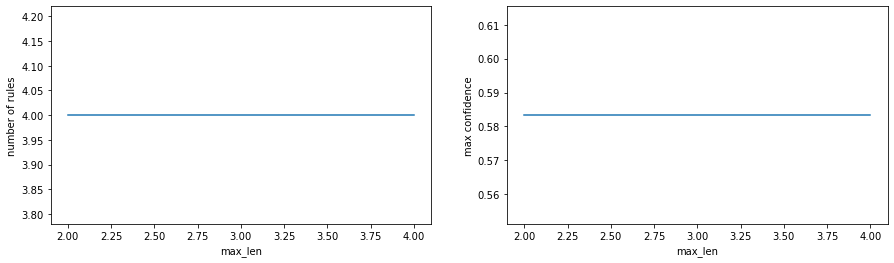

min_support:  0.008


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2512),(2221),0.029289,0.158996,0.014644,0.5,3.144737,0.009988,1.682008


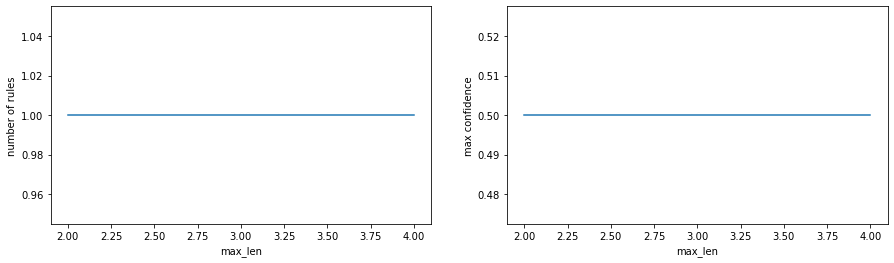

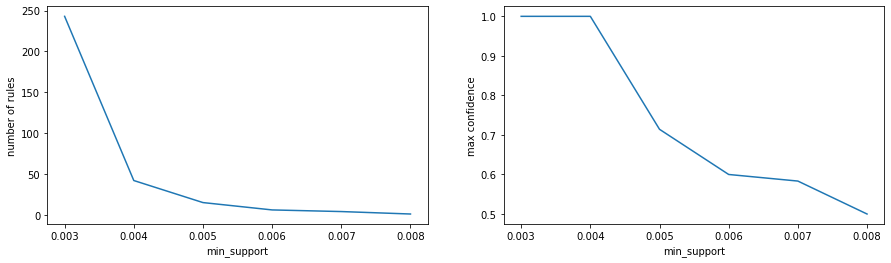

In [88]:
analyze_support_lenght(data_frame, fpgrowth)

Confidence:  0.5


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4171),(2221),0.009414,0.158996,0.005230,0.555556,3.494152,0.003733,1.892259
1,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.000000,6.289474,0.003519,inf
2,"(4171, 2221)",(1953),0.005230,0.069038,0.004184,0.800000,11.587879,0.003823,4.654812
3,(1324),(2221),0.014644,0.158996,0.007322,0.500000,3.144737,0.004994,1.682008
4,"(1953, 4260)",(2221),0.007322,0.158996,0.004184,0.571429,3.593985,0.003020,1.962343
5,(2414),(2221),0.008368,0.158996,0.004184,0.500000,3.144737,0.002854,1.682008
6,"(2480, 4022)",(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
7,"(4022, 1463)",(2221),0.006276,0.158996,0.004184,0.666667,4.192982,0.003186,2.523013
8,(402),(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
9,(2581),(2221),0.006276,0.158996,0.004184,0.666667,4.192982,0.003186,2.523013


Confidence:  0.6000000000000001


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.000000,6.289474,0.003519,inf
1,"(4171, 2221)",(1953),0.005230,0.069038,0.004184,0.800000,11.587879,0.003823,4.654812
2,"(2480, 4022)",(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
3,"(4022, 1463)",(2221),0.006276,0.158996,0.004184,0.666667,4.192982,0.003186,2.523013
4,(402),(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
5,(2581),(2221),0.006276,0.158996,0.004184,0.666667,4.192982,0.003186,2.523013
6,(2760),(2221),0.004184,0.158996,0.004184,1.000000,6.289474,0.003519,inf
7,"(2313, 1953)",(2221),0.007322,0.158996,0.005230,0.714286,4.492481,0.004066,2.943515
8,"(1953, 1683)",(2221),0.006276,0.158996,0.004184,0.666667,4.192982,0.003186,2.523013
9,"(3856, 1893)",(1463),0.005230,0.054393,0.004184,0.800000,14.707692,0.003900,4.728033


Confidence:  0.7000000000000001


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.000000,6.289474,0.003519,inf
1,"(4171, 2221)",(1953),0.005230,0.069038,0.004184,0.800000,11.587879,0.003823,4.654812
2,"(2480, 4022)",(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
3,(402),(2221),0.005230,0.158996,0.004184,0.800000,5.031579,0.003353,4.205021
4,(2760),(2221),0.004184,0.158996,0.004184,1.000000,6.289474,0.003519,inf
5,"(2313, 1953)",(2221),0.007322,0.158996,0.005230,0.714286,4.492481,0.004066,2.943515
6,"(3856, 1893)",(1463),0.005230,0.054393,0.004184,0.800000,14.707692,0.003900,4.728033
7,"(1893, 1463)",(3856),0.004184,0.027197,0.004184,1.000000,36.769231,0.004070,inf
8,"(3856, 1075)",(1463),0.004184,0.054393,0.004184,1.000000,18.384615,0.003957,inf
9,(2057),(1953),0.005230,0.069038,0.004184,0.800000,11.587879,0.003823,4.654812


Confidence:  0.8


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf
1,(2760),(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf
2,"(1893, 1463)",(3856),0.004184,0.027197,0.004184,1.0,36.769231,0.004070,inf
3,"(3856, 1075)",(1463),0.004184,0.054393,0.004184,1.0,18.384615,0.003957,inf
4,(4173),(2975),0.004184,0.009414,0.004184,1.0,106.222222,0.004145,inf


Confidence:  0.9


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf
1,(2760),(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf
2,"(1893, 1463)",(3856),0.004184,0.027197,0.004184,1.0,36.769231,0.004070,inf
3,"(3856, 1075)",(1463),0.004184,0.054393,0.004184,1.0,18.384615,0.003957,inf
4,(4173),(2975),0.004184,0.009414,0.004184,1.0,106.222222,0.004145,inf


Confidence:  1.0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf
1,(2760),(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf
2,"(1893, 1463)",(3856),0.004184,0.027197,0.004184,1.0,36.769231,0.004070,inf
3,"(3856, 1075)",(1463),0.004184,0.054393,0.004184,1.0,18.384615,0.003957,inf
4,(4173),(2975),0.004184,0.009414,0.004184,1.0,106.222222,0.004145,inf


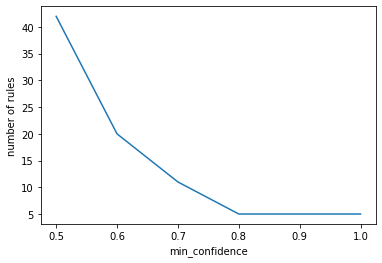

In [89]:
analyze_confidence(data_frame, fpgrowth)

### 4. Зробити висновки щодо впливу параметрiв алгоритмiв Apriori та FP-росту на знайденi множини АП.

Оскільки максимально можлива підтримка є досить малою, то всі дослідження параметрів проводилися для достовірності >0.5

1. З графаків залежності кількості прикладів від максимальної потужності частих наборів видно, що зі збільшенням мінімальної підтримки зменшується максимальна потужність.

2. З графіків залежності кількості прикладів від мінімальної підтримки видно, що до значення support = 0.004 кількість прикладів різко падає, а починаючи від 0.004 спадає дуже повільно.

Ці два пункти є досить інтуїтивно зрозумілі з самого означення підтримки та достовірності. Очевидно, що набори з великою потужністю будуть зустрічатися рідше, ніж малою потужністю. До того ж кількість наборів, які зустрічаються рідше є більшою, ніж наборів, які зустрічаються часто; звідси стрімкий спад кількості прикладів до пітримки при дуже малій підтриці, адже кожен набір зустрічається хоча б 1 раз (support = 0.001, цей варіант навіть не розлядався).

3. Зі збільшенням достовірності зменшується кількість правил.
4. Зі збільшенням  підтримки зменшується достовірність правил.


### 5. Знайти значення прогнозу на основi побудованої множини правил.

In [97]:
def make_predict(df, algorithm):
    rules = association_rules(algorithm(df, min_support=0.002), metric='lift', min_threshold=1.0)
    r=rules[rules['confidence']==1].sort_values('support', ascending=[False]).head()
    display(r)
    r=rules[rules['support'] > 0.01].sort_values('support', ascending=[False]).head()
    display(r)
    r=rules[rules['lift'] > 100].sort_values('lift', ascending=[False]).head(20)
    display(r)
    r=rules[(rules['support']>0.005)&(rules['confidence']>0.7)]
    display(r)

##### Apriori

In [98]:
make_predict(data_frame, apriori)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4568,(4173),(2975),0.004184,0.009414,0.004184,1.0,106.222222,0.004145,inf
8172,"(1893, 1463)",(3856),0.004184,0.027197,0.004184,1.0,36.769231,0.004070,inf
9598,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf
7012,"(3856, 1075)",(1463),0.004184,0.054393,0.004184,1.0,18.384615,0.003957,inf
3546,(2760),(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2913,(2221),(1953),0.158996,0.069038,0.025105,0.157895,2.287081,0.014128,1.105518
2912,(1953),(2221),0.069038,0.158996,0.025105,0.363636,2.287081,0.014128,1.321578
1844,(1144),(4219),0.122385,0.066946,0.023013,0.188034,2.808761,0.014819,1.149130
1845,(4219),(1144),0.066946,0.122385,0.023013,0.343750,2.808761,0.014819,1.337318
1586,(1144),(1879),0.122385,0.074268,0.019874,0.162393,2.186590,0.010785,1.105211


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11694,(3443),"(3632, 3323, 524)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
13547,"(3632, 3323)","(2873, 3443, 524)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
13537,"(3632, 2873, 3443)","(3323, 524)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
12454,"(1953, 3965, 3809)",(1373),0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
13538,"(3632, 3443, 3323)","(2873, 524)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
10446,"(3690, 2221)",(2673),0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
10447,(2673),"(3690, 2221)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
13539,"(3632, 2873, 3323)","(3443, 524)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
12448,"(3856, 1177)","(3328, 1893)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
13542,"(3443, 524)","(3632, 2873, 3323)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9443,"(1953, 2313)",(2221),0.007322,0.158996,0.00523,0.714286,4.492481,0.004066,2.943515


##### FP-growth

In [99]:
make_predict(data_frame, fpgrowth)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
634,"(1953, 4171)",(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf
5936,"(1893, 1463)",(3856),0.004184,0.027197,0.004184,1.0,36.769231,0.004070,inf
6006,"(3856, 1075)",(1463),0.004184,0.054393,0.004184,1.0,18.384615,0.003957,inf
11346,(4173),(2975),0.004184,0.009414,0.004184,1.0,106.222222,0.004145,inf
2150,(2760),(2221),0.004184,0.158996,0.004184,1.0,6.289474,0.003519,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
190,(1953),(2221),0.069038,0.158996,0.025105,0.363636,2.287081,0.014128,1.321578
191,(2221),(1953),0.158996,0.069038,0.025105,0.157895,2.287081,0.014128,1.105518
452,(1144),(4219),0.122385,0.066946,0.023013,0.188034,2.808761,0.014819,1.149130
453,(4219),(1144),0.066946,0.122385,0.023013,0.343750,2.808761,0.014819,1.337318
924,(1144),(1879),0.122385,0.074268,0.019874,0.162393,2.186590,0.010785,1.105211


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9817,"(4186, 1893)","(3856, 2874, 1075)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
12439,(554),(72),0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
12651,(2894),(787),0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
12650,(787),(2894),0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
12643,"(3491, 2996)","(440, 2313)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
12642,"(2313, 2996)","(440, 3491)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
12639,"(440, 3491)","(2313, 2996)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
12638,"(440, 2313)","(3491, 2996)",0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
12438,(72),(554),0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf
12088,"(3425, 1505)",(1608),0.002092,0.002092,0.002092,1.0,478.0,0.002088,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2384,"(2313, 1953)",(2221),0.007322,0.158996,0.00523,0.714286,4.492481,0.004066,2.943515




1. Як можна побачити з таблиць, багато правил має достовірність, рівну 1, що означає, що товар-"antecedents", купується лише з товаром-"consequents". Однак підтримка цих правил є дуже малою. Максимального значення пітримки (0.004184) при цьому набуває 5 правил, проте найбільше значення метрики 'lift' має правило:

(4173) -> (2975)

2. Оскільки обсяг пропозиції товарів (>49683, з них 4438 куплено хоча б 1 раз) значно перевищує кількість покупок (956 успішних замовлень, в сумі 9720 куплених товарів), при чому кількість товарів в одному замовленні є невеликою, то максимальна можлива підтримка є досить малою. Максимального значення (0.025105) набуває 2 правила, але вищу достовірність має правило:

(1953) -> (2221)

3. Максимального значення метрики 'lift' набуває багато правил, які при цьому мають максимальну достовірність, проте дуже малу підтримку (зустрічаються ~2 рази з 956).


* Правило, яке має не максимальні, але відносно високі метрики:

(2313, 1953) -> (2221)


Зважаючи на велику різницю між пропозицією та замовленями, вибрати 1 найточніше правило не можна, бо якщо правила зустрічаються частіше, то мають малу достовірність, а якщо мають максимальну достовірність, то зустрічаються <5 раз.

### 6. Порiвняти результати, отриманi алгоритмами Apriori та FP-росту.

З побудованих в ході роботи таблиць та графіків видно, що обидва алгоритми повертають одинаковий результат. Оскільки двома алгоритмами опрацьовувалися одинакові початкові дані, це свідчить про коректність роботи програми.